In [41]:
import math
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
from pathlib import Path

import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
from matplotlib.ticker import MaxNLocator


In [23]:
score_dfs = list()
for job_dir_name in ["122_native_decoys_1_state", "121_native_decoys"]:
    job_dir = Path(Path.home(), "Documents/xray/score_bench/data/7mhf", job_dir_name)
    score_df_file = Path(job_dir, "rand1000_score.csv")
    score_df = pd.read_csv(score_df_file, index_col=0)
    for k in range(10):
        score_df["xray_0_{}+xray_1_{}".format(k,k)] = score_df["xray_0_{}".format(k)] + score_df["xray_1_{}".format(k)]
        score_df["rmsd_0_{}+rmsd_1_{}".format(k,k)] = (score_df["rmsd_0_{}".format(k)] + score_df["rmsd_1_{}".format(k)])/2
        score_df["r_free_0_{}+r_free_1_{}".format(k,k)] = (score_df["r_free_0_{}".format(k)] + score_df["r_free_1_{}".format(k)])/2

    score_dfs.append(score_df)

score_dfs[0].head()

,ff,rmsd_0,w_0_0,w_0_1,pdb,xray_0_0,rmsd_0_0,r_free_0_0,xray_1_0,rmsd_1_0,...,r_free_0_6+r_free_1_6,xray_0_7+xray_1_7,rmsd_0_7+rmsd_1_7,r_free_0_7+r_free_1_7,xray_0_8+xray_1_8,rmsd_0_8+rmsd_1_8,r_free_0_8+r_free_1_8,xray_0_9+xray_1_9,rmsd_0_9+rmsd_1_9,r_free_0_9+r_free_1_9
0,-76.761041,0.429148,1.0,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.430951,0.775896,0.466733,6.434657,0.776849,...,0.484956,12.907333,0.844689,0.488647,12.877593,0.806227,0.465834,13.031894,0.919688,0.492031
1,619.841361,0.278701,1.0,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.443769,0.932133,0.482920,6.445220,0.933133,...,0.493924,12.935668,0.927859,0.481240,12.916105,0.927746,0.492532,11.858529,0.281260,0.237307
2,26.217846,0.393315,1.0,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.435151,0.820454,0.474390,6.438673,0.821552,...,0.349109,12.921376,0.897849,0.490035,12.910419,0.857858,0.482548,13.024766,0.921564,0.488434
3,-108.393602,0.473150,1.0,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.437017,0.820957,0.475306,6.438998,0.816755,...,0.484597,12.928430,0.873379,0.492432,12.914061,0.913695,0.482523,13.036777,0.973050,0.495959
4,-97.975721,0.478038,1.0,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,6.430476,0.816518,0.474636,6.432805,0.817277,...,0.405315,12.915273,0.883504,0.487951,12.901338,0.838877,0.476948,13.029326,0.904153,0.490855


In [24]:
score_dfs[1].head()

,ff,rmsd_0,rmsd_1,w_0_0,w_1_0,w_0_1,w_1_1,pdb,xray_0_0,rmsd_0_0,...,r_free_0_6+r_free_1_6,xray_0_7+xray_1_7,rmsd_0_7+rmsd_1_7,r_free_0_7+r_free_1_7,xray_0_8+xray_1_8,rmsd_0_8+rmsd_1_8,r_free_0_8+r_free_1_8,xray_0_9+xray_1_9,rmsd_0_9+rmsd_1_9,r_free_0_9+r_free_1_9
0,1094.620088,0.233136,0.355286,0.409869,0.590131,0.288601,0.711399,/wynton/group/sali/mhancock/xray/sample_bench/...,5.719582,0.233132,...,0.481279,12.671379,0.861940,0.500842,12.648643,0.807543,0.469912,12.681686,0.890654,0.485215
1,21516.272752,0.060189,0.180694,0.526350,0.473650,0.700749,0.299251,/wynton/group/sali/mhancock/xray/sample_bench/...,4.551007,0.060163,...,0.481936,12.638338,0.852368,0.502549,12.606403,0.785452,0.476580,12.574047,0.904593,0.496403
2,1742.797728,0.240529,0.268159,0.420897,0.579103,0.215034,0.784966,/wynton/group/sali/mhancock/xray/sample_bench/...,6.296127,0.809924,...,0.486820,11.480958,0.254342,0.244185,12.661584,0.818189,0.479214,12.718519,0.881914,0.488872
3,2699.275558,0.220044,0.203889,0.838902,0.161098,0.658923,0.341077,/wynton/group/sali/mhancock/xray/sample_bench/...,6.375926,0.833084,...,0.480051,12.722084,0.826855,0.494648,12.711933,0.838888,0.484499,12.848819,0.882247,0.493309
4,4359.874285,0.163736,0.355056,0.567668,0.432332,0.272126,0.727874,/wynton/group/sali/mhancock/xray/sample_bench/...,5.381283,0.163741,...,0.482216,12.663981,0.867043,0.500635,12.638904,0.812400,0.471895,12.686368,0.901872,0.489257


In [25]:
# natives_df = pd.read_csv(Path(Path.home(), "Documents/xray/dev/29_synthetic_native_3/data/scores/7mhf_30.csv"), index_col=0)
# natives_df["xray_0+xray_1"] = natives_df["xray_0"] + natives_df["xray_1"]
# natives_df["rmsd_0+rmsd_1"] = (natives_df["rmsd_0"] + natives_df["rmsd_1"])/2
# natives_df["r_free_0+r_free_1"] = (natives_df["r_free_0"] + natives_df["r_free_1"])/2

# natives_df.head()

glob_min_df = pd.read_csv(Path(Path.home(), "Documents/xray/score_bench/data/7mhf/122_native_decoys_1_state/global_min.csv"), index_col=0)

In [26]:
def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def fp(x,L,k,x0):
    return (L * k * np.exp(-k * (x - x0))) / (1 + np.exp(-k * (x - x0)))**2

def fdp(x,L,k,x0):
    return (L * k**2 * np.exp(-2*k * (x - x0)) * (-np.exp(k * (x - x0)) + 1)) / (1 + np.exp(-k * (x - x0)))**3


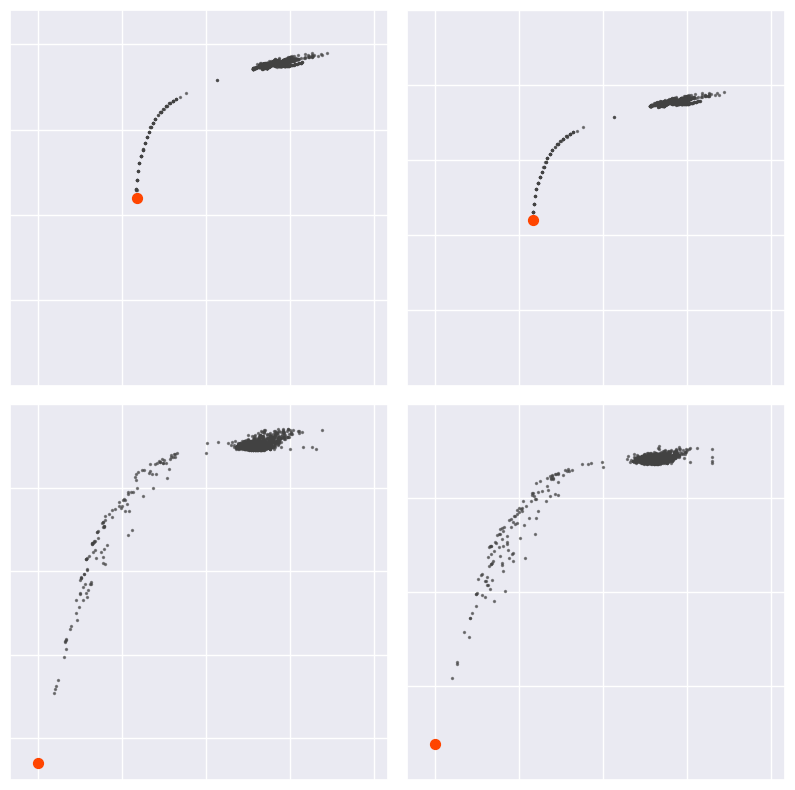

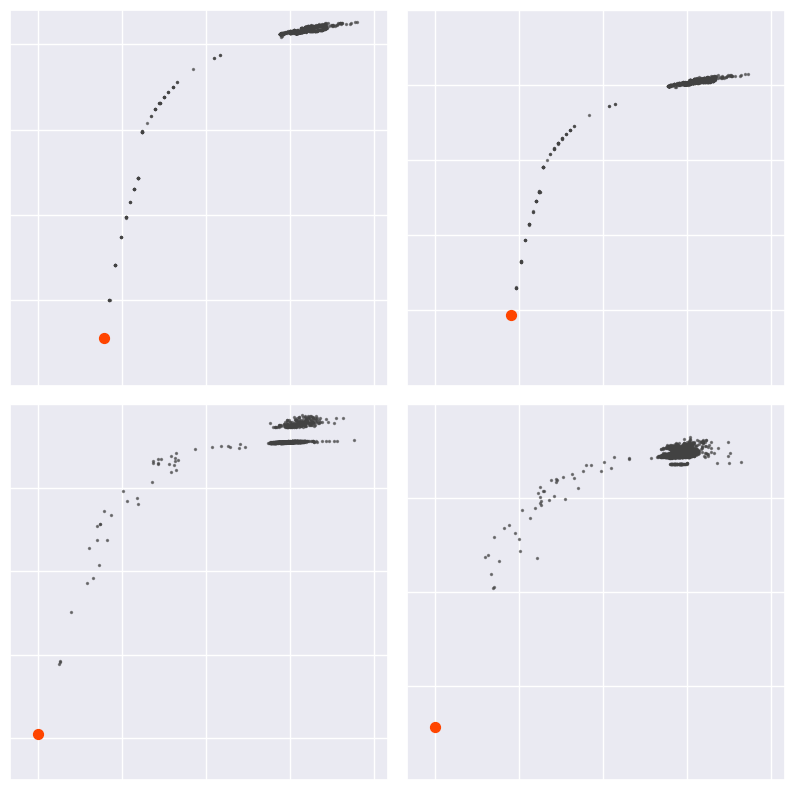

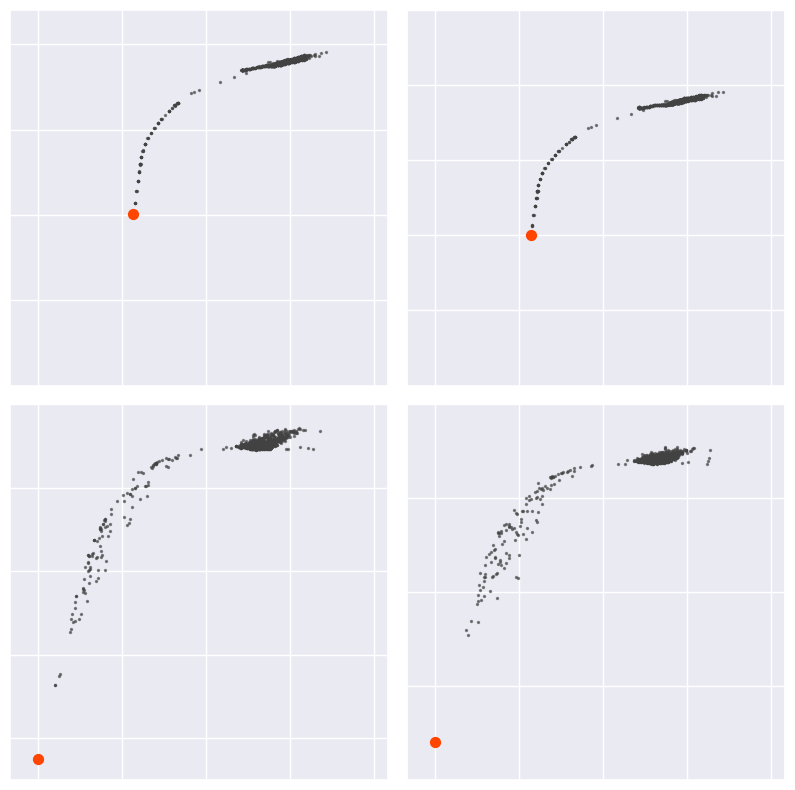

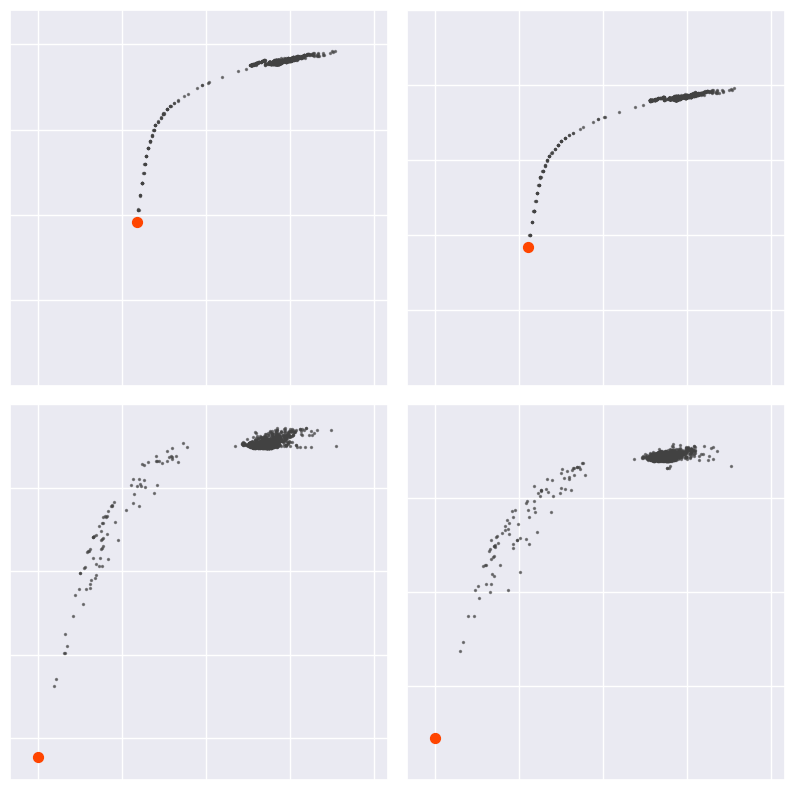

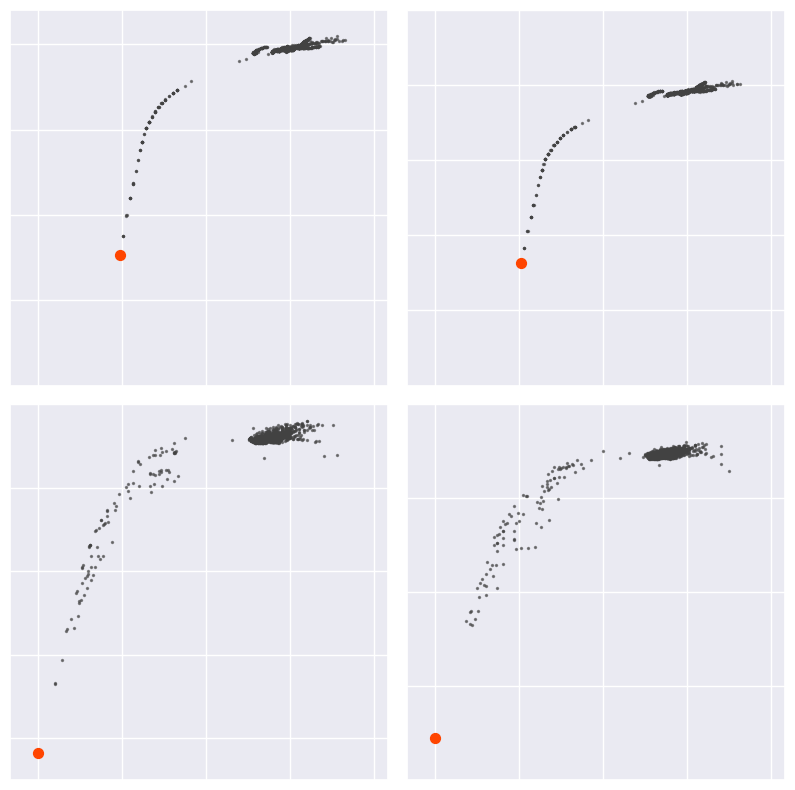

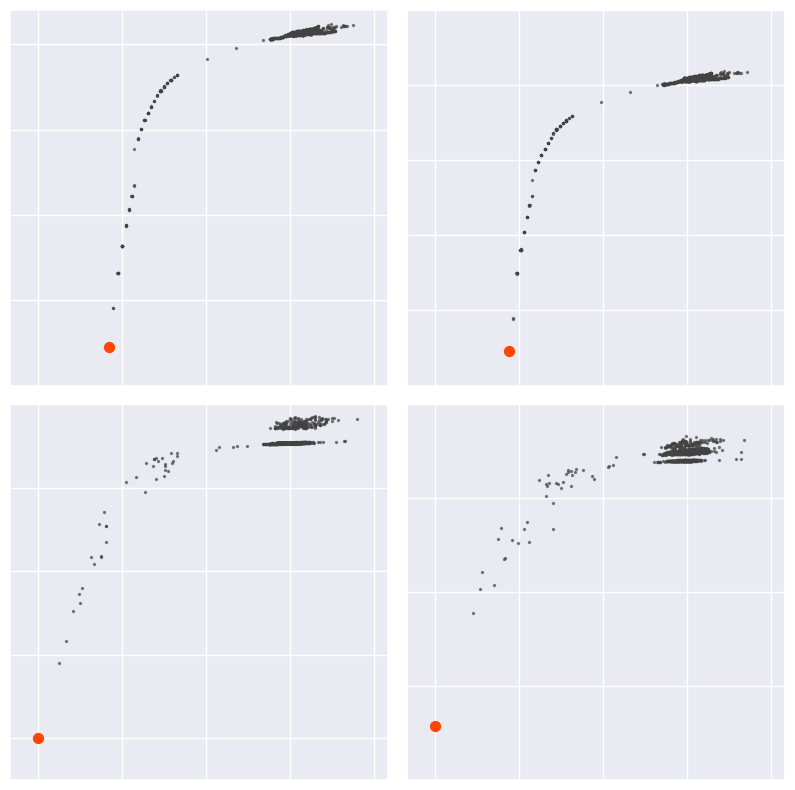

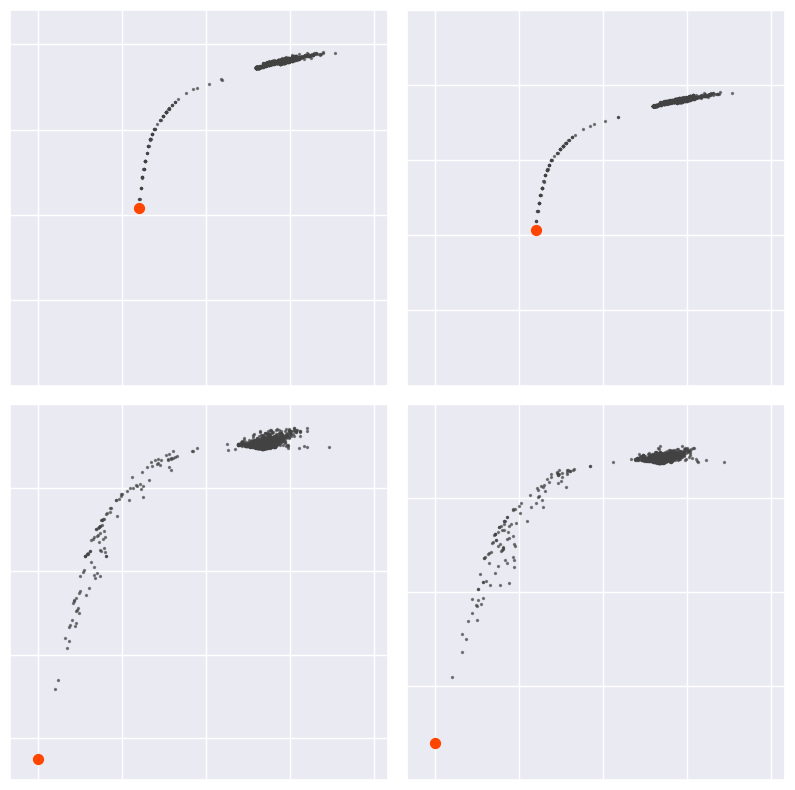

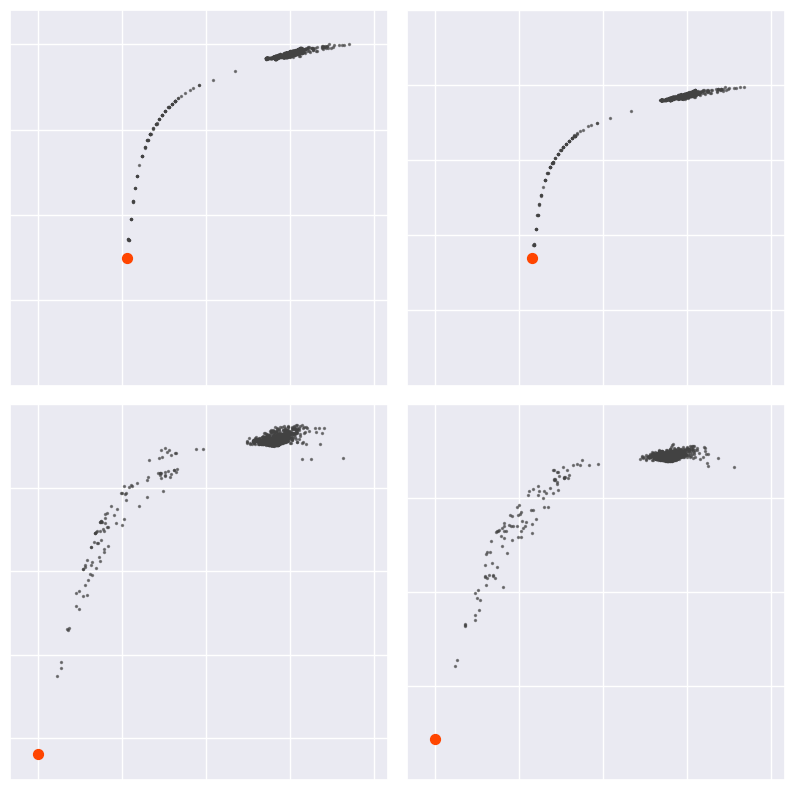

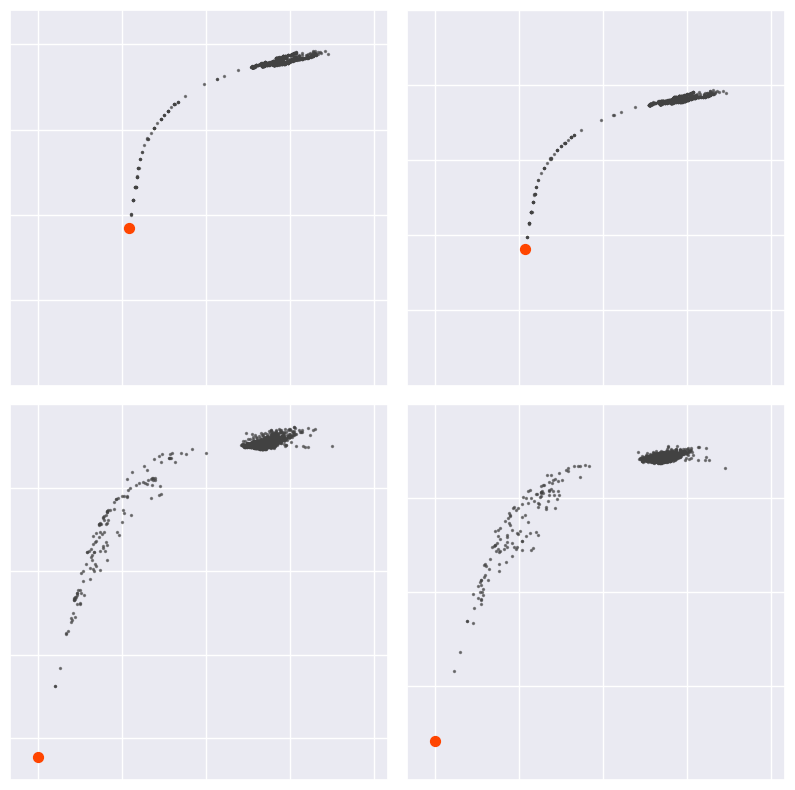

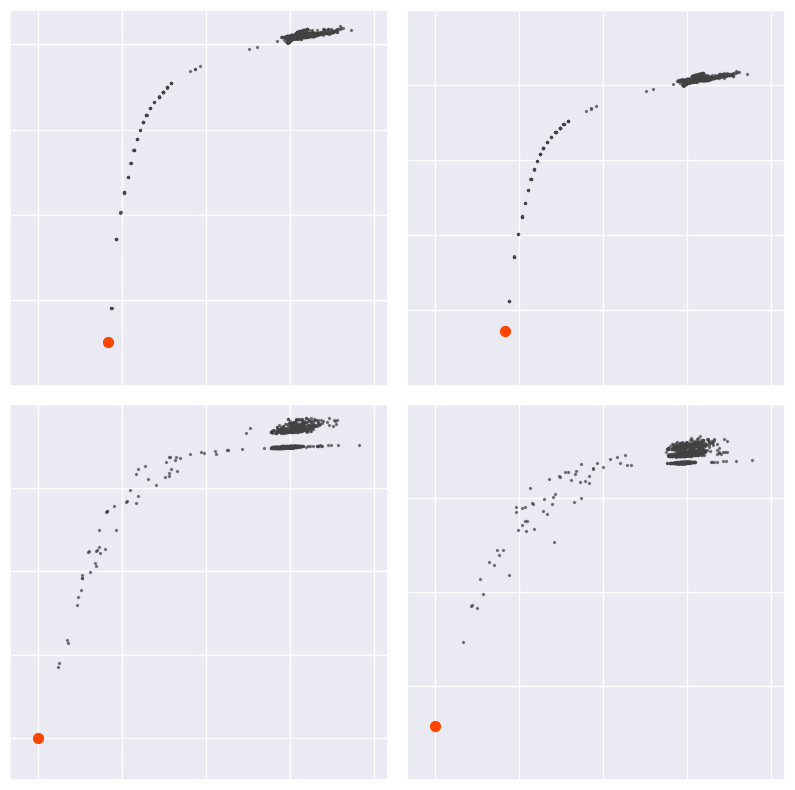

In [43]:
alpha_off = .2
alpha_on = .6

for k in range(10):
    fig_file = Path(Path.home(), "Desktop/fig_{}.png".format(k))
    fig, axs = plt.subplots(2, 2, figsize=(10,10))

    for N in [1, 2]:
        score_df = score_dfs[N-1]

        for J in [1, 2]:
            # if cond == 0:
            #     score_field="r_free_0_{}".format(k)
            #     rmsd_field="rmsd_0_{}".format(k)
            # elif cond == 1:
            #     score_field="r_free_0_{}+r_free_1_{}".format(k,k)
            #     rmsd_field="rmsd_0_{}+rmsd_1_{}".format(k,k)

            if J == 1:
                score_field="xray_0_{}".format(k)
                rmsd_field="rmsd_0_{}".format(k)
            elif J == 2:
                score_field="xray_0_{}+xray_1_{}".format(k,k)
                rmsd_field="rmsd_0_{}+rmsd_1_{}".format(k,k)

            xs = score_df[rmsd_field]
            ys = score_df[score_field]

            ax = axs[N-1][J-1]

            # param_est = [12, 10.8636, 0.06799455]
            # params, covariance = curve_fit(logistic_func, xs, ys, param_est, maxfev=10000)
            # L_fit, k_fit, x0_fit = params

            # A = np.vstack([np.square(ys), ys, np.ones(len(ys))]).T
            # coefs, residuals, rank, s = np.linalg.lstsq(A, xs, rcond=None)
            # print(coefs)

            # linespace = [0 + x*(1)/1000 for x in range(1000)]
            # ax.plot(linespace, [coefs[0]*x**2 + coefs[1]*x + coefs[2] for x in linespace], c="black", linewidth=1, linestyle="dashed")

            # if J == 1:
            #     score_field="xray_0".format(k)
            #     rmsd_field="rmsd_0".format(k)
            # elif J == 2:
            #     score_field="xray_0+xray_1".format(k,k)
            #     rmsd_field="rmsd_0+rmsd_1".format(k,k)

            native_score = glob_min_df.loc[k, "{}_{}".format(N, J)]
            native_row = score_df[score_df[score_field] == score_df[score_field].min()].iloc[0]

            ax.scatter(xs, ys, c="#424242ff", s=2, alpha=alpha_on)

            if N == 1:
                ax.scatter(native_row[rmsd_field], native_row[score_field], s=50, c=mcolors.CSS4_COLORS["orangered"])
            elif N == 2:
                ax.scatter(0, native_score, s=50, c=mcolors.CSS4_COLORS["orangered"])

            ax.set_xlim(-.1, 1.25)

            if J == 1 and N == 2:
                ax.set_ylim(3.9, 6.6)
            if J == 2 and N == 2:
                ax.set_ylim(7.5, 13.5)
            if J == 1 and N == 1:
                ax.set_ylim(5.5, 6.6)
            if J == 2 and N == 1:
                ax.set_ylim(11, 13.5)

            ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
            ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

            # if cond == 0:
            #     ax.set_ylim(3.75, 6.75)
            # elif cond == 1:
            #     ax.set_ylim(7.5, 13.5)

            ax.tick_params(bottom=False, labelbottom=False)
            ax.tick_params(left=False, labelleft=False)
            plt.xlabel(None)
            plt.ylabel(None)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.savefig(fig_file, dpi=300)

    # break


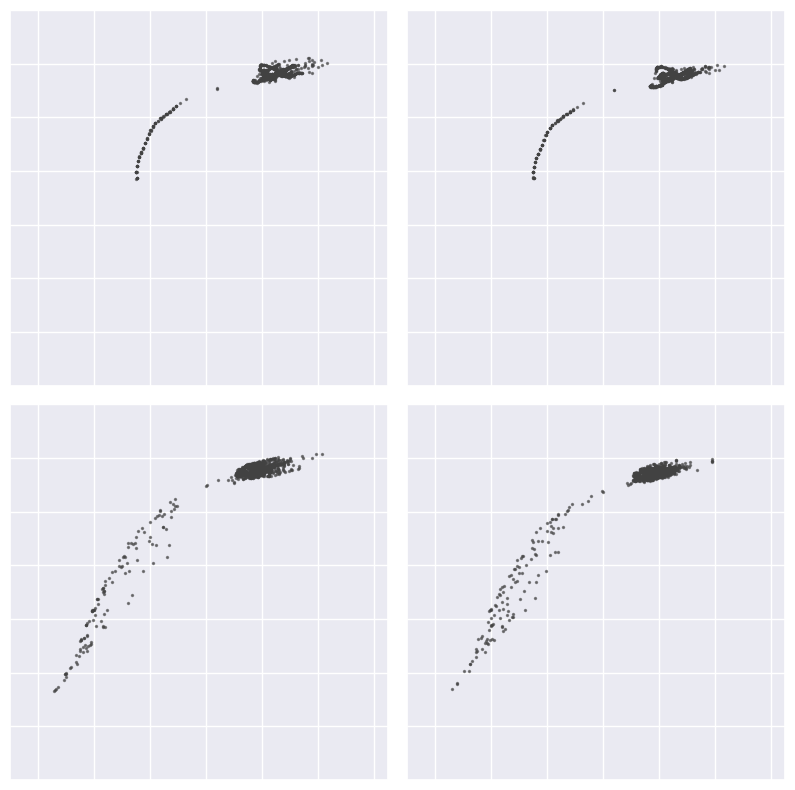

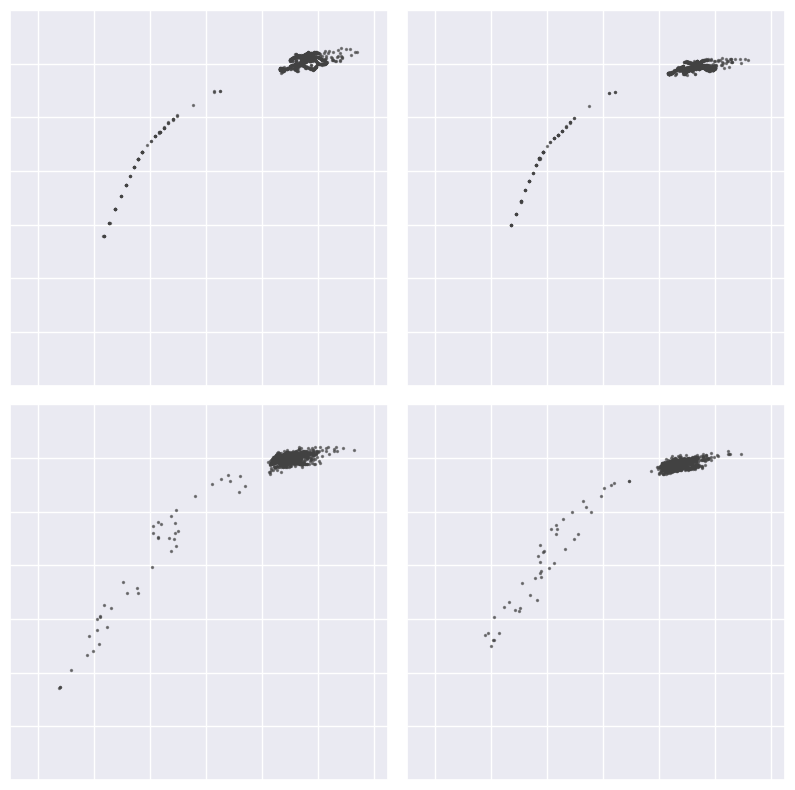

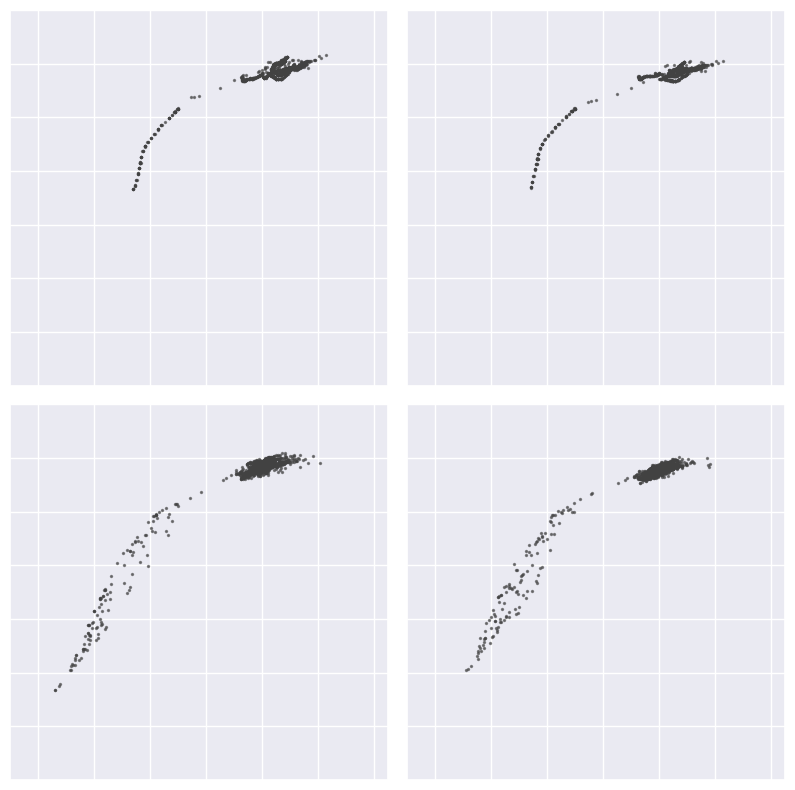

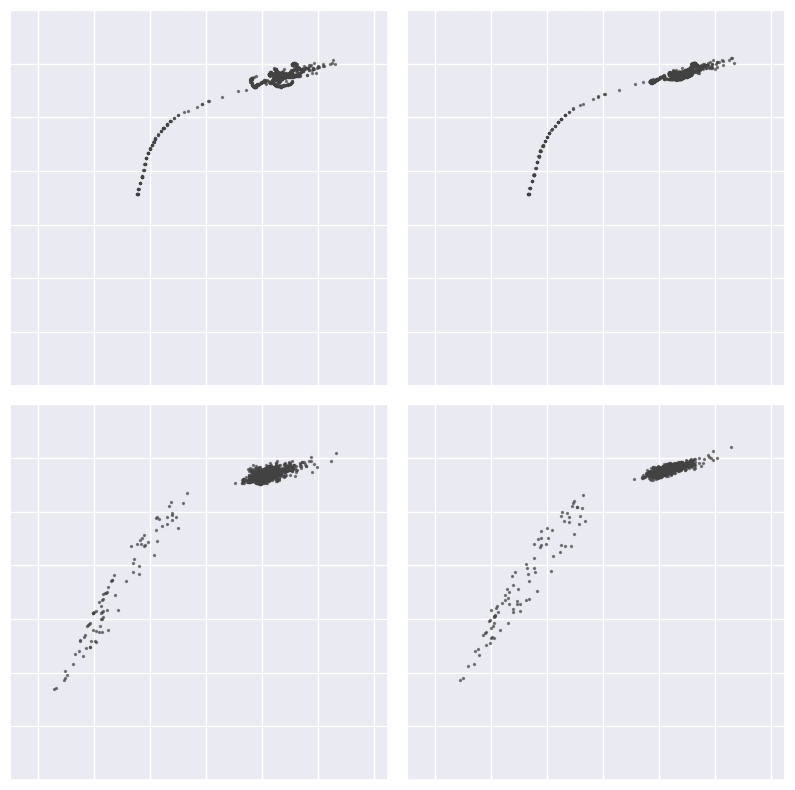

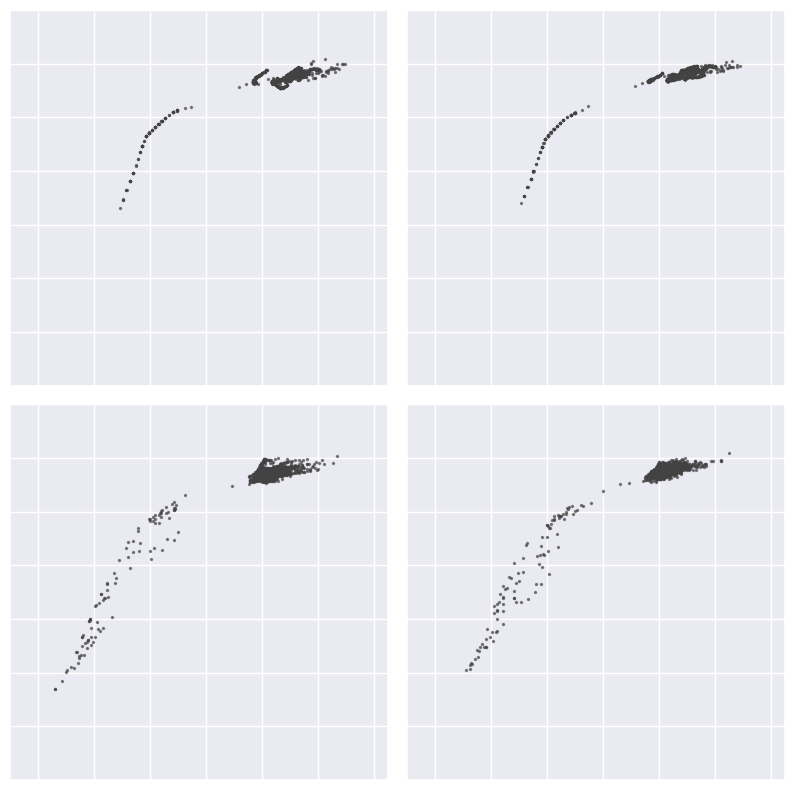

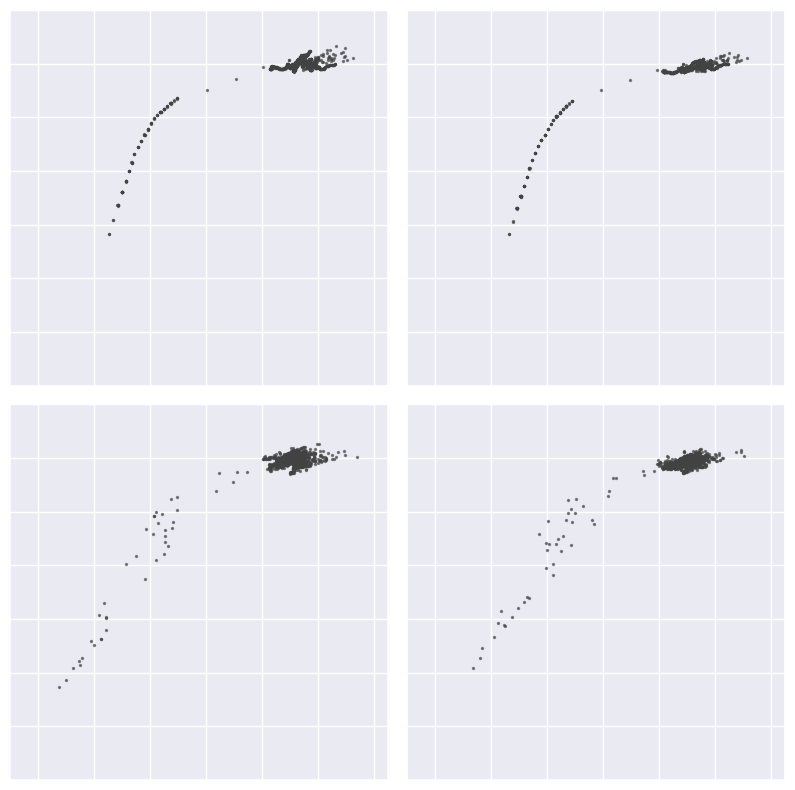

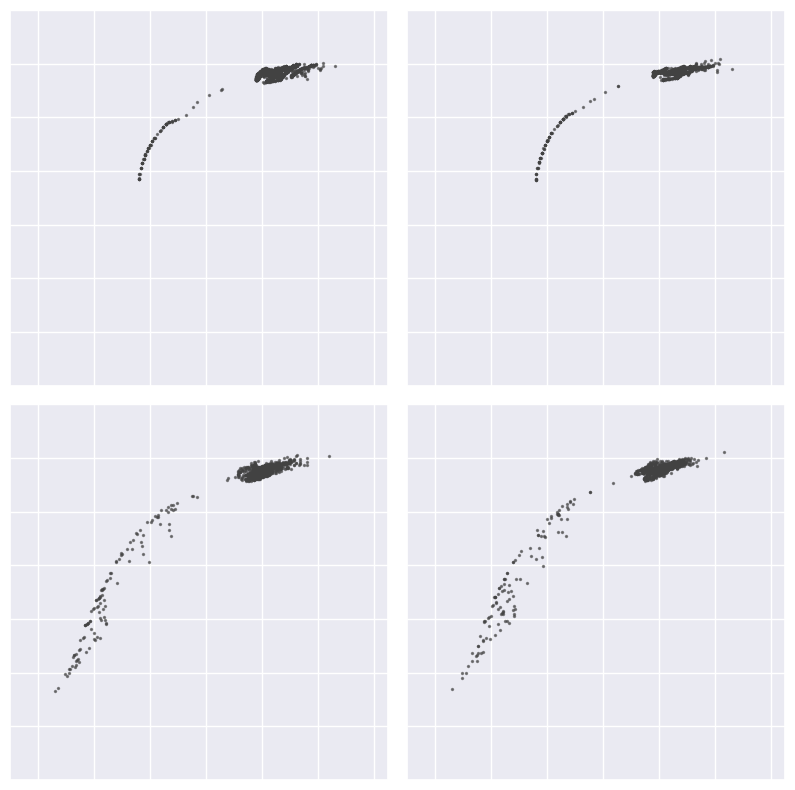

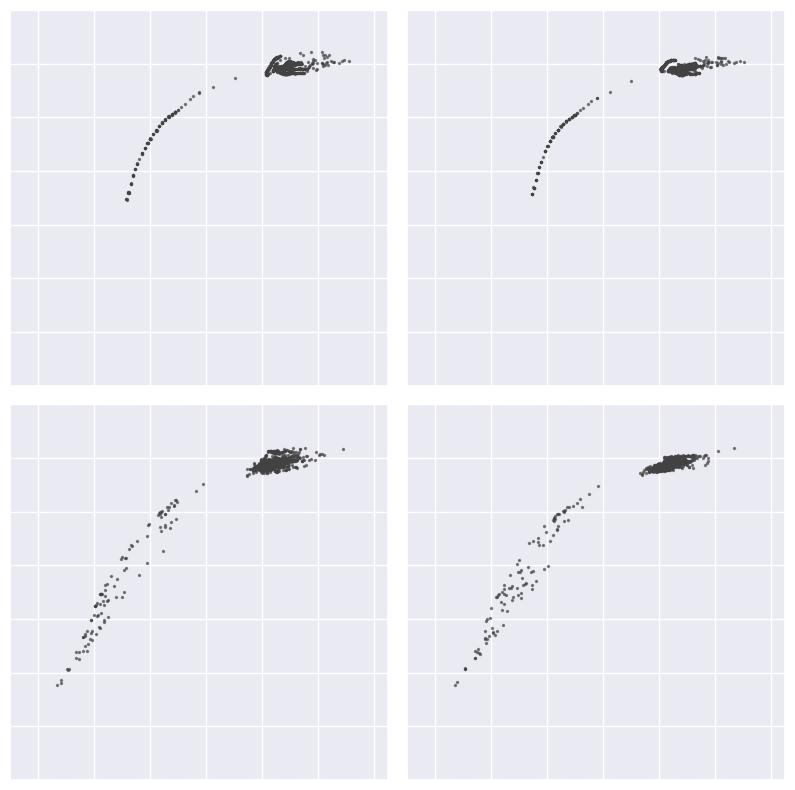

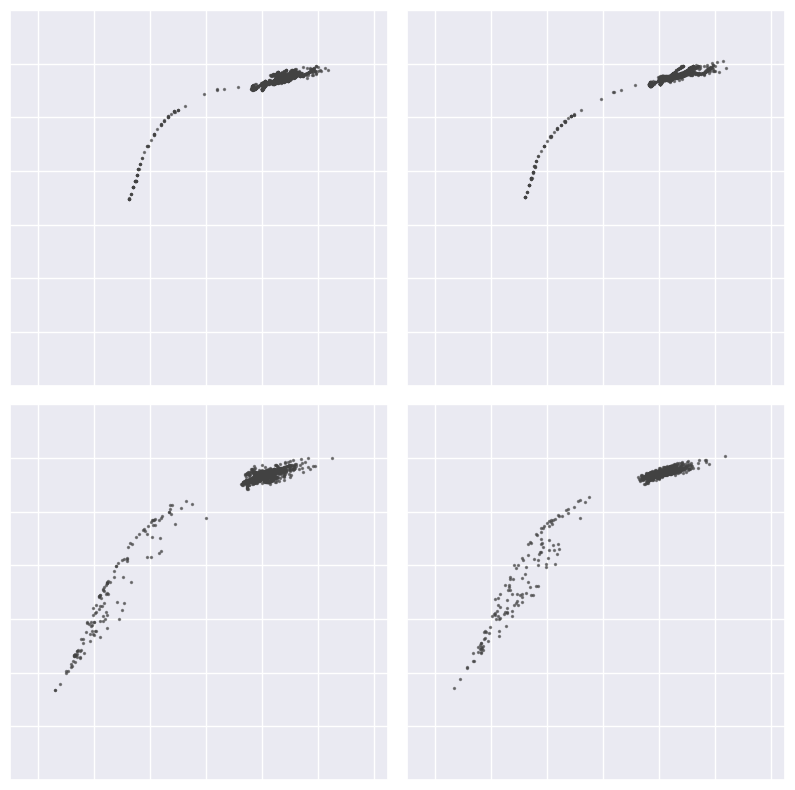

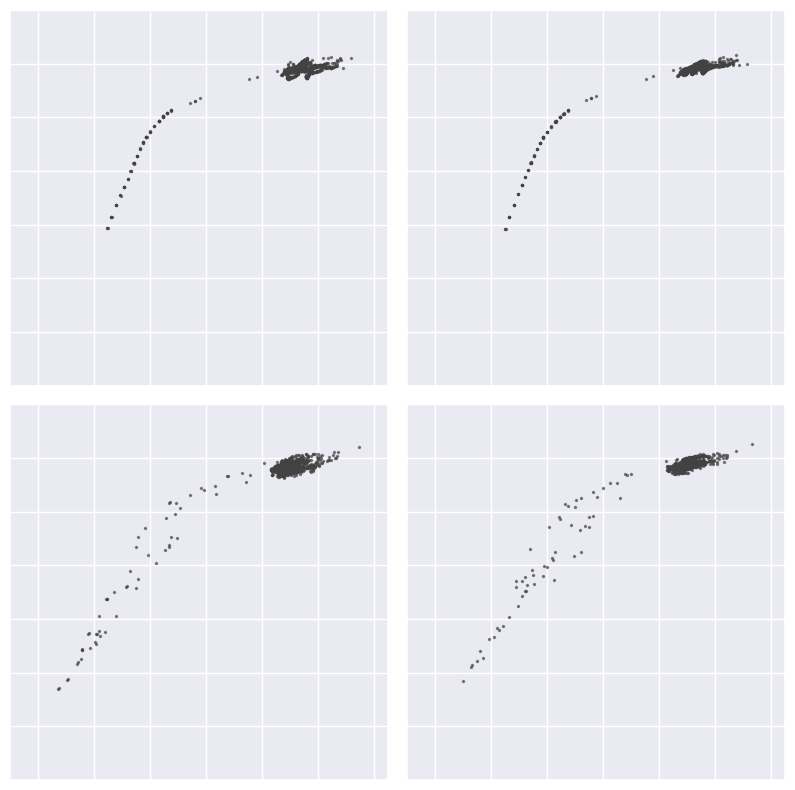

In [47]:
alpha_off = .2
alpha_on = .6

for k in range(10):
    fig_file = Path(Path.home(), "Desktop/fig_{}.png".format(k))
    fig, axs = plt.subplots(2, 2, figsize=(10,10))

    for N in [1, 2]:
        score_df = score_dfs[N-1]

        for J in [1, 2]:
            if J == 1:
                score_field="r_free_0_{}".format(k)
                rmsd_field="rmsd_0_{}".format(k)
            elif J == 2:
                score_field="r_free_0_{}+r_free_1_{}".format(k,k)
                rmsd_field="rmsd_0_{}+rmsd_1_{}".format(k,k)

            xs = score_df[rmsd_field]
            ys = score_df[score_field]

            ax = axs[N-1][J-1]

            # native_score = glob_min_df.loc[k, "{}_{}".format(N, J)]
            # native_row = score_df[score_df[score_field] == score_df[score_field].min()].iloc[0]

            ax.scatter(xs, ys, c="#424242ff", s=2, alpha=alpha_on)

            # if N == 1:
            #     ax.scatter(native_row[rmsd_field], native_row[score_field], s=50, c=mcolors.CSS4_COLORS["orangered"])
            # elif N == 2:
            #     ax.scatter(0, native_score, s=50, c=mcolors.CSS4_COLORS["orangered"])

            ax.set_xlim(-.1, 1.25)
            ax.set_ylim(-.1,.6)

            ax.tick_params(bottom=False, labelbottom=False)
            ax.tick_params(left=False, labelleft=False)
            plt.xlabel(None)
            plt.ylabel(None)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    # plt.savefig(fig_file, dpi=300)


In [8]:
plt.savefig(fig_file)

<Figure size 640x480 with 0 Axes>